# New Section

# import important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Reading the CSV File

In [2]:
from google.colab import files
uploaded= files.upload()


Saving imports.csv to imports.csv
Saving retail-prices.csv to retail-prices.csv
Saving total-production.csv to total-production.csv


In [3]:
Coffee_product = pd.read_csv("total-production.csv")


# Melt the dataframe: rows = Year, Country, Total_Production
production_melted = Coffee_product.melt(id_vars='total_production',
                                    var_name='Year',
                                    value_name='Total_Production')

# Rename the 'total_production' column to 'Year'
production_melted.rename(columns={'total_production': 'Country'}, inplace=True)

# Convert Year to integer, Total_Production to float
production_melted['Year'] = production_melted['Year'].astype(int)
production_melted['Total_Production'] = pd.to_numeric(production_melted['Total_Production'], errors='coerce')

# Preview result
print(production_melted.head())


                            Country  Year  Total_Production
0                            Angola  1990           50.3450
1  Bolivia (Plurinational State of)  1990          122.7770
2                            Brazil  1990        27285.6286
3                           Burundi  1990          487.3930
4                           Ecuador  1990         1503.8150


In [4]:
retail_price = pd.read_csv("retail-prices.csv")

# Rename the first column to 'Country' if it doesn't have a proper header
retail_price.rename(columns={retail_price.columns[0]: 'Country'}, inplace=True)

# Melt the wide format into long format
retail_price_melted = retail_price.melt(id_vars='Country',
                                        var_name='Year',
                                        value_name='Retail_Price')

# Convert Year to int and Retail_Price to float
retail_price_melted['Year'] = retail_price_melted['Year'].astype(int)
retail_price_melted['Retail_Price'] = pd.to_numeric(retail_price_melted['Retail_Price'], errors='coerce')

# Preview result
print(retail_price_melted.head())


      Country  Year  Retail_Price
0     Austria  1990     10.816777
1      Cyprus  1990      6.247241
2     Denmark  1990      8.410596
3     Finland  1990      6.578366
4      France  1990      8.233996


In [5]:
import_csv= pd.read_csv("imports.csv")

import_csv.rename(columns={import_csv.columns[0]: 'Country'}, inplace=True)

import_csv_melted = import_csv.melt(id_vars='Country',
                                   var_name='Year',
                                   value_name='imports')


import_csv_melted['Year'] = import_csv_melted['Year'].astype(int)
import_csv_melted['imports'] = pd.to_numeric(import_csv_melted['imports'], errors='coerce')

print(import_csv_melted.head())


                 Country  Year  imports
0                Austria  1990   1880.0
1                Belgium  1990      NaN
2     Belgium/Luxembourg  1990   2015.0
3               Bulgaria  1990    268.0
4                Croatia  1990      NaN


# Cleaning Data

In [6]:
import_csv_melted.isnull().sum()

,0
Country,0
Year,0
imports,193


In [7]:
retail_price_melted.isnull().sum()

,0
Country,0
Year,0
Retail_Price,0


In [8]:
production_melted.isnull().sum()

,0
Country,0
Year,0
Total_Production,0


In [9]:
import_csv_melted.duplicated().sum()

np.int64(0)

In [10]:
retail_price_melted.duplicated().sum()

np.int64(0)

In [11]:
production_melted.duplicated().sum()


np.int64(0)

In [12]:
import_csv_melted['imports'].describe()

,imports
count,4070.000000
mean,895.233373
std,2746.738094
min,0.000000
25%,3.000000
50%,50.000000
75%,557.000000
max,29487.886464


In [13]:
production_melted['Total_Production'].describe()

,Total_Production
count,1624.000000
mean,2209.623978
std,6331.010350
min,0.000000
25%,35.974875
50%,337.865500
75%,1500.411250
max,62924.883600


In [14]:
import_csv_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  4263 non-null   object 
 1   Year     4263 non-null   int64  
 2   imports  4070 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 100.0+ KB


In [15]:
production_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           1624 non-null   object 
 1   Year              1624 non-null   int64  
 2   Total_Production  1624 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.2+ KB


In [16]:
retail_price_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       406 non-null    object 
 1   Year          406 non-null    int64  
 2   Retail_Price  406 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.6+ KB


In [17]:
import_csv_melted.fillna(0, inplace=True)

In [18]:
all_countries = set(production_melted['Country']) | \
                set(import_csv_melted['Country']) | \
                set(retail_price_melted['Country'])
missing_in_production = all_countries - set(production_melted['Country'])
missing_in_imports = all_countries - set(import_csv_melted['Country'])
missing_in_retail = all_countries - set(retail_price_melted['Country'])

print(" Missing in Production Data:", missing_in_production)
print(" Missing in Import Data:", missing_in_imports)
print(" Missing in Retail Price Data:", missing_in_retail)



 Missing in Production Data: {'Tunisia', '   Denmark', 'Anguilla', '   Ireland', 'Egypt', 'USA', 'Chad', '   Greece', 'Kazakhstan', 'Uruguay', '   Luxembourg', 'Guinea-Bissau', '   Romania', 'Syrian Arab Republic', 'Georgia', 'Bangladesh', 'Tonga', '   Croatia', '   Austria', 'Belarus', 'Morocco', 'Africa', 'Niger', 'Netherlands Antilles', 'Australia', 'Lebanon', 'United Arab Emirates', 'Solomon Islands', '   Hungary', 'United Kingdom', '   Italy', 'Caribbean', 'New Zealand', 'Bahamas', 'Iceland', 'South Africa, Rep.of', 'Comoros', 'Seychelles', 'Turkey', 'Saint Vincent & the Grenadines', 'North America', 'Kiribati', 'Botswana', 'Gambia', 'Norway', 'Myanmar', 'Lesotho', 'Central America & Mexico', 'Chile', 'South America', 'Russian Federation', '   United Kingdom', 'Dominica', 'Puerto Rico', 'Iraq', 'Cayman Islands', 'Azerbaijan', 'Mauritius', 'Afghanistan', 'Micronesia, Fed. States of', 'Bahrain', 'Japan', 'Yugoslavia', 'Somalia', 'Iran, Islamic Rep. of', 'Samoa', 'Vanuatu', 'Asia & O

In [19]:
merge = pd.merge(import_csv_melted, retail_price_melted, on=['Country', 'Year'])
merge.head()

,Country,Year,imports,Retail_Price
0,Austria,1990,1880.0,10.816777
1,Cyprus,1990,50.0,6.247241
2,Denmark,1990,959.0,8.410596
3,Finland,1990,1095.0,6.578366
4,France,1990,6301.0,8.233996


In [20]:
final_file = pd.merge(merge, production_melted,how='outer', on=['Country', 'Year'])
final_file.head()

,Country,Year,imports,Retail_Price,Total_Production
0,Austria,1990,1880.0,10.816777,NaN
1,Austria,1991,2058.0,10.088300,NaN
2,Austria,1992,2206.0,11.015453,NaN
3,Austria,1993,1836.0,10.971302,NaN
4,Austria,1994,1417.0,10.110375,NaN


In [21]:
final_file.isnull().sum()

,0
Country,0
Year,0
imports,1624
Retail_Price,1624
Total_Production,377


In [22]:
final_file.duplicated().sum()

np.int64(0)

In [23]:
final_file.fillna(0, inplace=True)

In [24]:
final_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           2001 non-null   object 
 1   Year              2001 non-null   int64  
 2   imports           2001 non-null   float64
 3   Retail_Price      2001 non-null   float64
 4   Total_Production  2001 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 78.3+ KB


In [25]:
columns_list= ['imports','Retail_Price','Total_Production']
final_file[columns_list].describe().T

,count,mean,std,min,25%,50%,75%,max
imports,2001.0,622.763779,2259.103859,0.0,0.000,0.0000,0.000,21816.000000
Retail_Price,2001.0,1.986943,4.627146,0.0,0.000,0.0000,0.000,39.116998
Total_Production,2001.0,1793.318011,5768.295708,0.0,1.403,113.5037,990.531,62924.883600


In [26]:
print('Countris :',final_file['Country'].unique())
print('Number of Countris :',final_file['Country'].nunique())


Countris : ['   Austria' '   Cyprus' '   Denmark' '   Finland' '   France'
 '   Germany' '   Italy' '   Netherlands' '   Portugal' '   Spain'
 '   Sweden' 'Angola' 'Benin' 'Bolivia (Plurinational State of)' 'Brazil'
 'Burundi' 'Cameroon' 'Central African Republic' 'Colombia' 'Congo'
 'Costa Rica' 'Cuba' "Côte d'Ivoire" 'Democratic Republic of Congo'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Equatorial Guinea'
 'Ethiopia' 'Gabon' 'Ghana' 'Guatemala' 'Guinea' 'Guyana' 'Haiti'
 'Honduras' 'India' 'Indonesia' 'Jamaica' 'Japan' 'Kenya'
 "Lao People's Democratic Republic" 'Liberia' 'Madagascar' 'Malawi'
 'Mexico' 'Nepal' 'Nicaragua' 'Nigeria' 'Norway' 'Panama'
 'Papua New Guinea' 'Paraguay' 'Peru' 'Philippines' 'Rwanda'
 'Sierra Leone' 'Sri Lanka' 'Tanzania' 'Thailand' 'Timor-Leste' 'Togo'
 'Trinidad & Tobago' 'Uganda' 'Venezuela' 'Viet Nam' 'Yemen' 'Zambia'
 'Zimbabwe']
Number of Countris : 69


In [27]:
print('Minimum of year', final_file['Year'].min())
print('Maximum of year', final_file['Year'].max())

Minimum of year 1990
Maximum of year 2018


In [28]:
# Total Imports, Production, and Retail Price per Country (Overall)

Country_Summary = round(final_file.groupby('Country')[columns_list].sum() , 2).reset_index()
Country_Summary.head()

,Country,imports,Retail_Price,Total_Production
0,Austria,37226.0,335.56,0.0
1,Cyprus,1531.0,302.69,0.0
2,Denmark,23803.0,304.33,0.0
3,Finland,27781.0,209.14,0.0
4,France,156299.0,198.68,0.0


In [29]:
print(Country_Summary.columns.tolist())

['Country', 'imports', 'Retail_Price', 'Total_Production']


In [30]:
# Dictionary to store list of countries per column with 0
zero_columns = {}

# Loop through each column except 'Country'
for col in Country_Summary.columns:
    if col != 'Country':
        zero_rows = Country_Summary[Country_Summary[col] == 0]
        zero_countries = list(zero_rows['Country'])
         # Only add if there are countries with zero
        if zero_countries:
            zero_columns[col] = zero_countries

# Print result
for col, countries in zero_columns.items():
    print(f" Countries with 0 in '{col}':")
    print(countries)


 Countries with 0 in 'imports':
['Angola', 'Benin', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi', 'Cameroon', 'Central African Republic', 'Colombia', 'Congo', 'Costa Rica', 'Cuba', "Côte d'Ivoire", 'Democratic Republic of Congo', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Jamaica', 'Kenya', "Lao People's Democratic Republic", 'Liberia', 'Madagascar', 'Malawi', 'Mexico', 'Nepal', 'Nicaragua', 'Nigeria', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Rwanda', 'Sierra Leone', 'Sri Lanka', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Trinidad & Tobago', 'Uganda', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe']
 Countries with 0 in 'Retail_Price':
['Angola', 'Benin', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi', 'Cameroon', 'Central African Republic', 'Colombia', 'Congo', 'Costa Rica', 'Cuba', "Côte d'Ivoire"

In [31]:
Max_import = Country_Summary['imports'].max()
for i in Country_Summary[Country_Summary['imports'] == Max_import]['Country']:
  print(f'{i} has {Max_import} imports')


   Germany has 392584.0 imports


In [32]:
Max_Retail = Country_Summary['Retail_Price'].max()
for i in Country_Summary[Country_Summary['Retail_Price'] == Max_Retail]['Country']:
  print(f'{i} has {Max_Retail} Retail price')

Japan has 622.72 Retail price


In [33]:
Max_Production = Country_Summary['Total_Production'].max()
for i in Country_Summary[Country_Summary['Total_Production']== Max_Production]['Country']:
  print(f'{i} has {Max_Production} Production')

Brazil has 1190965.74 Production


#Trends Over Time (Global)

In [34]:

year_summary = round(final_file.groupby('Year')[columns_list].sum().reset_index(), 2)
year_summary.tail()

,Year,imports,Retail_Price,Total_Production
24,2014,8400.00,170.77,149753.04
25,2015,8863.00,149.40,153987.64
26,2016,8825.00,141.26,159915.54
27,2017,8448.00,145.96,158074.18
28,2018,8283.32,150.51,170936.74


# Visualisation

Line Plot: Global Trend of Imports, Production, and Retail Price Over Time

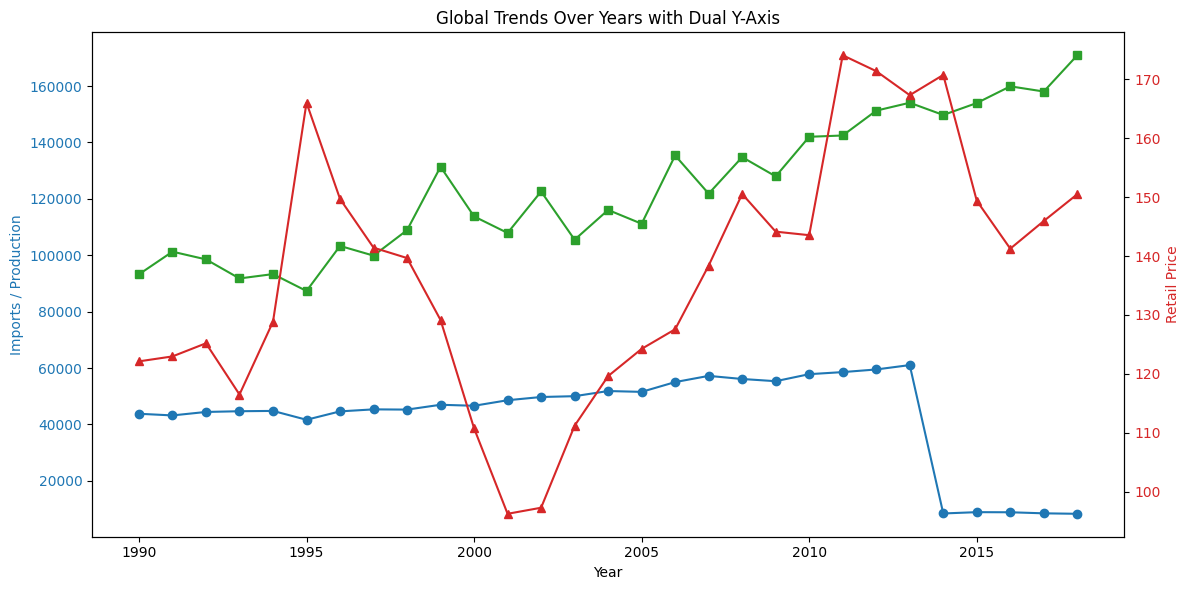

In [35]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Imports / Production', color='tab:blue')
ax1.plot(year_summary['Year'], year_summary['imports'], label='Imports', color='tab:blue', marker='o')
ax1.plot(year_summary['Year'], year_summary['Total_Production'], label='Production', color='tab:green', marker='s')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for Retail Price
ax2 = ax1.twinx()
ax2.set_ylabel('Retail Price', color='tab:red')
ax2.plot(year_summary['Year'], year_summary['Retail_Price'], label='Retail Price', color='tab:red', marker='^')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Global Trends Over Years with Dual Y-Axis')
fig.tight_layout()
plt.show()



Top 10 Countries by Total Imports



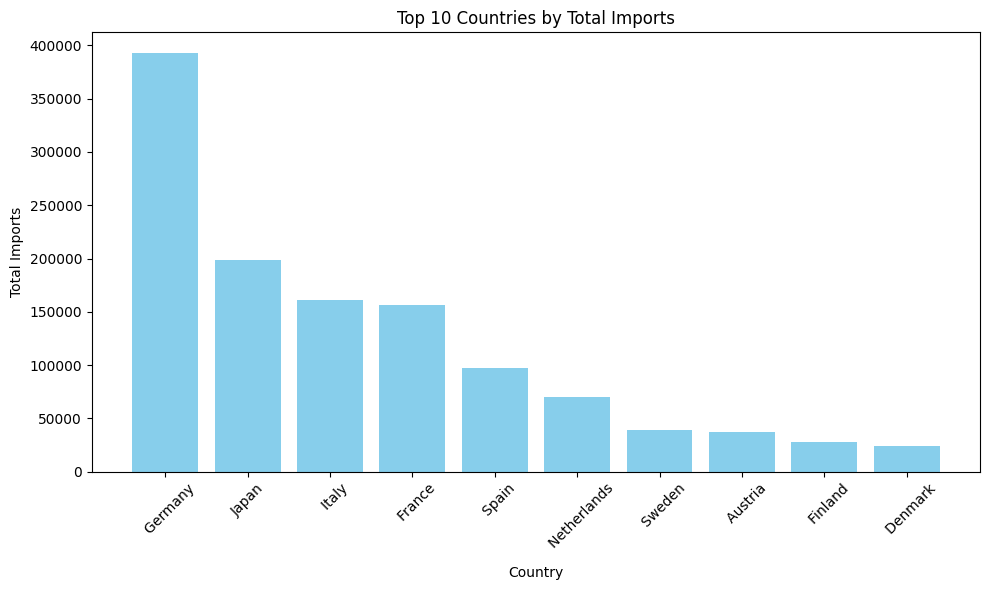

In [36]:
top_10_country = Country_Summary.sort_values(by='imports', ascending=False).reset_index(drop=True)
top_10_country = top_10_country.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_country['Country'], top_10_country['imports'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Imports')
plt.title('Top 10 Countries by Total Imports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 **Heatmap**: Year vs Country Retail prices

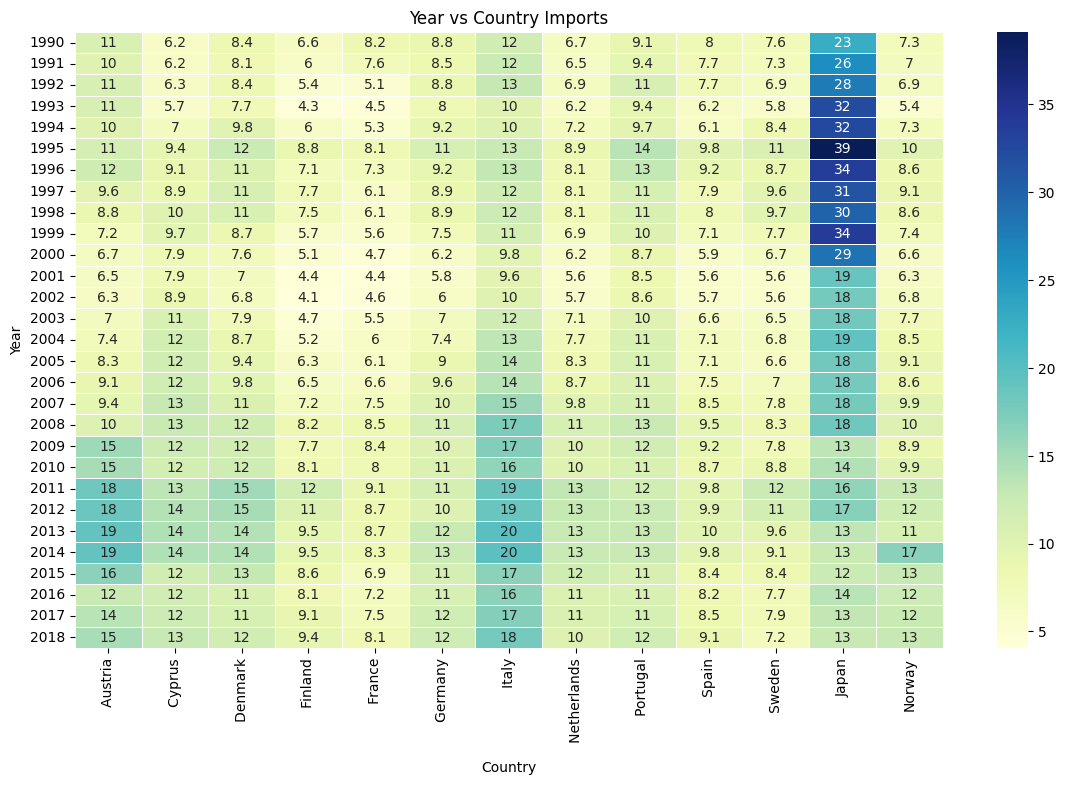

In [37]:
Retail_price_notnull = final_file[final_file['Retail_Price'] != 0]
pivot_file = pd.pivot_table(Retail_price_notnull, values='Retail_Price', index='Year', columns='Country')
plt.figure(figsize= (14,8))
sns.heatmap(pivot_file, cmap='YlGnBu',annot=True, linewidths=.5)
plt.title('Year vs Country Imports')
plt.xlabel('Country')
plt.ylabel('Year')
plt.show()

 Scatter Plot: Imports vs Production

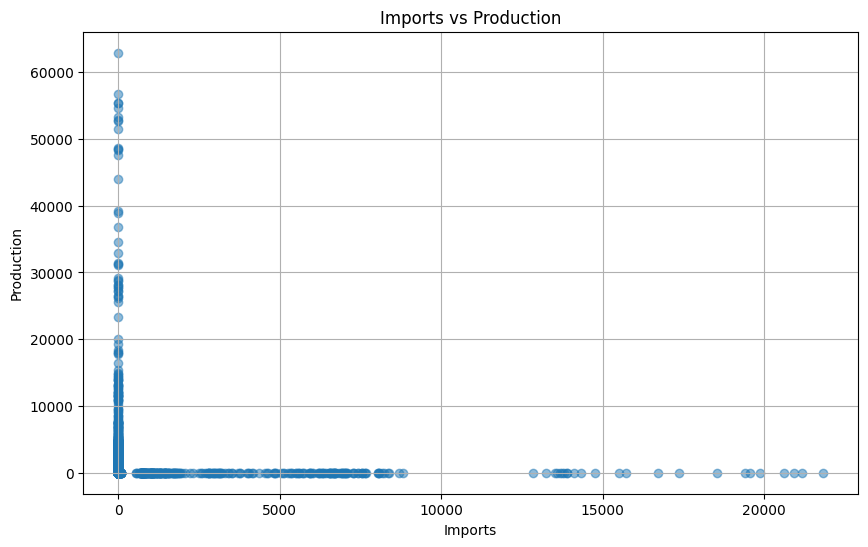

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(final_file['imports'], final_file['Total_Production'], alpha=0.5)
plt.xlabel('Imports')
plt.ylabel('Production')
plt.title('Imports vs Production')
plt.grid(True)
plt.show()

### Top 5 overtime
- Create a line chart with the top 5 nations over time.


In [41]:
top_5_yearly = (
    final_file.groupby(['Year', 'Country'])['imports']
    .sum()
    .reset_index()
    .sort_values(['Year', 'imports'], ascending=[True, False]).T
)


top_5_yearly.head()



,5,4,39,6,7,9,0,10,3,2,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
Year,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
Country,Germany,France,Japan,Italy,Netherlands,Spain,Austria,Sweden,Finland,Denmark,...,Thailand,Timor-Leste,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen,Zambia,Zimbabwe
imports,13671.0,6301.0,5330.0,5242.0,3128.0,3053.0,1880.0,1767.0,1095.0,959.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Composition Over Time
- The client is interested in looking at how Brazil's share of global coffee production has chnaged overtime.
- Build a plot that global total production as well as Brazil's contribution to global production over time.

In [42]:
Brazile_Coffe = production_melted[production_melted['Country'] == 'Brazil']
Brazile_Coffee= round(Brazile_Coffe.groupby('Year')['Total_Production'].sum(), 2).reset_index()
rest_other_Country = production_melted[production_melted['Country'] != 'Brazil']
Other_countries= round(rest_other_Country.groupby('Year')['Total_Production'].sum(), 2).reset_index()
Brizil_compare_other = pd.merge(Brazile_Coffee, Other_countries, on='Year', suffixes=('_Brazil', '_Other'))
Brizil_compare_other.head()

,Year,Total_Production_Brazil,Total_Production_Other
0,1990,27285.63,65944.43
1,1991,27293.49,73973.19
2,1992,34603.35,63922.54
3,1993,28166.98,63597.64
4,1994,28192.05,65121.15


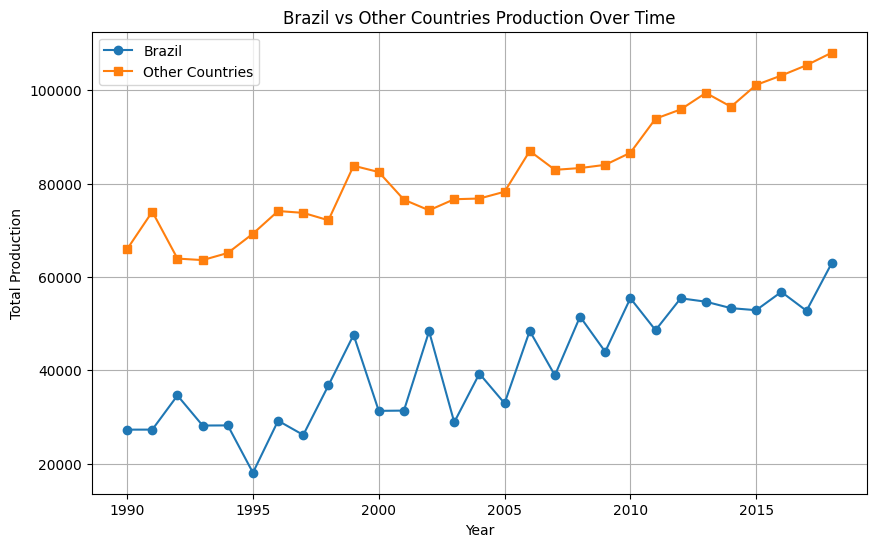

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(Brizil_compare_other['Year'], Brazile_Coffee['Total_Production'], label='Brazil', marker='o')
plt.plot(Brizil_compare_other['Year'], Other_countries['Total_Production'], label='Other Countries', marker='s')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.title('Brazil vs Other Countries Production Over Time')
plt.legend()
plt.grid(True)
plt.show()


### Price Relationships
- We need to ecplore how Brazil compares to its competitors in terms of production. Build a scatterplot compating Brazil vs. Vietname and one comparing Brazil to Venezuela.

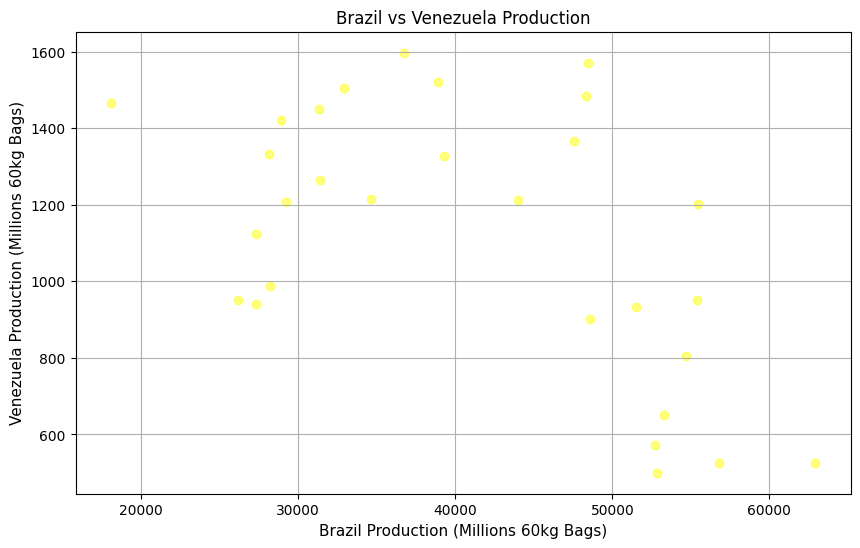

In [54]:
plt.figure(figsize=(10, 6))
Brazile = production_melted[production_melted['Country'] == 'Brazil'].sort_values(by='Year')
Venezuela = production_melted[production_melted['Country'] == 'Venezuela'].sort_values(by='Year')
plt.scatter(Brazile['Total_Production'],Venezuela['Total_Production'], alpha=0.5, color = 'Yellow')
plt.xlabel('Brazil Production (Millions 60kg Bags)', fontsize=11)
plt.ylabel('Venezuela Production (Millions 60kg Bags)', fontsize=11)
plt.title('Brazil vs Venezuela Production')
plt.grid(True)
plt.show()
